# Model Selection and Seasonal ARIMA

Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/python](https://feng.li/python)

## Estimation

## Conditional Sum of Squares

- A straightforward way to estimate ARMA models is via least squares. For an ARMA(1,1)

$$\underset{c,\phi,\theta}{\min}\sum_{t=1}^T\left(y_t-c-\phi_1 y_{t-1}-\theta\epsilon_{t-1}\right)^2$$

- Need to condition on initial values

- Need to find a way to update all $\epsilon$

## Recursion

- Use the following recursion to update the $\epsilon$

$$\begin{aligned}\color{blue}{\epsilon_2}&=y_2-c-\phi y_{1}-\theta\epsilon_1\\\color{red}{\epsilon_3}&=y_t-c-\phi y_{2}-\theta\color{blue}{\epsilon_2}\\\epsilon_4&=y_t-c-\phi y_{3}-\theta\color{red}{\epsilon_3}\\\vdots&=\vdots\quad\vdots\quad\vdots\end{aligned}$$

- There is no closed form solution for $c$, $\theta$ and $\phi$ but they can be found numerically.

## Initial values

- There are many options but a common one is to condition on the first $p$ observed values of $y$ and set any $\epsilon$ that need to be conditioned on to zero.
- For an ARMA(1,1) condition on $y_1$ and set $\epsilon_1=0$. Then use observations $t=2,\dots,T$ in the sums of squares.

$$\underset{c,\phi,\theta}{\min}\sum_{t=2}^T\left(y_t-c-\phi_1 y_{t-1}-\theta\epsilon_{t-1}\right)^2$$

- Other options include setting $y_0=0$ or setting $y_0=E(Y)$ and using all of the data.
- For stationary, invertible process, impact is minimal with enough data.

## Likelihood

- Maximum likelihood maximises the joint density of the data with respect to the parameters

$$\begin{aligned}\hat{\Theta},\hat{\Phi},\hat\sigma,\hat c=&\underset{c,\Phi,\Theta,\sigma}{\max}f(y_1,y_2,\dots,y_T|c, \Theta,\Phi,\sigma^2\color{blue}{,y_0,y_{-1},\dots,\epsilon_0, \epsilon_{-1},\dots})\\=&\underset{c,\Phi,\Theta,\sigma}{\max}L(c, \Theta,\Phi,\sigma^2;y_1,y_2,\dots,y_T\color{blue}{,y_0,y_{-1},\dots,\epsilon_0, \epsilon_{-1},\dots})\\\end{aligned}$$

- Assume $\epsilon_t\sim N(0,\sigma^2)$ for all $t$, i.e. assume normality
- Conditional likelihood (includes parts in <span style="color:blue;">blue</span>) equivalent to conditional sum of squares.
- Unconditional likelihood does not have any of the parts in <span style="color:blue;">blue</span> and requires the Kalman filter.

## Advantages

- Maximum likelihood is
  - A consistent estimator
  - Asymptotically normal
  - Can be used to compute information criteria for model selection
- Assuming normality is a disadvantage, but... 
- ...pseudo maximum likelihood theory establishes robustness to this assumption.

## Information criteria

For a model with $k$ parameters, all IC take the form

$$IC = -2\log L + k\times q$$

- The log likelihood measures the "fit" of the data, with higher values indicating a better fit.
- To avoid overfitting there is a "penalty" on the number of parameters $k$.
- If many ARIMA models are fit by maximum likelihood, information criteria can be computed for each model 
- Choose the model with the **lowest** value of the information criterion.



## AIC, AICc and BIC

- If $q=2$ we have the **AIC**. Theoretically the AIC will choose a model closest to the true data generating process (DGP), even if the true DGP is not one of the models estimated.
- If $q=2+\frac{2(k+1)}{T-k-1}$ we have the **AICc**. The AIC relies on asymptotic arguments, the AICc is a correction for finite samples.
- if $q=log(T)$ we have the **BIC**. Theoretically the BIC is model consistent (it will choose the correct model as $T\rightarrow\infty$). However the true DGP must be one of the models under consideration.
- In ARIMA modelling AICc is most commonly used

## Model Selection

## Auto Arima

- Box-Jenkins approach of looking at ACF and PACF plots popular when computers were slow.
- With improvements in computing it is possible to search through a large number of possible ARIMA models and select the best models using selection criteria.
- One popular such algorithm is *auto arima*, proposed by [Hyndman and Khandakar (2008)](https://doi.org/10.18637/jss.v027.i03) and implemented in R packages.
- For a Python implementation install [`statsforecast`](https://github.com/Nixtla/statsforecast)

## Auto Arima (find $d$)

- Step 1 is to find the correct level of differencing using a hypothesis test
- By default the KPSS test is used.
  - Null is that data are stationary
  - If fail to reject, $d=0$. If rejected, take differences and apply KPSS test again. 
  - If fail to reject, $d=1$. If rejected a second time, $d=2$.
- Other tests (augmented Dickey-Fuller and Phillips Perron) can be used.
  - The null for these is that data are non-stationary.

## Auto Arima (find $p,q$)

- Fit four models
  - ARIMA(0,d,0)
  - ARIMA(1,d,0)
  - ARIMA(0,d,1)
  - ARIMA(2,d,2)
- Select the model from the above list that minimises AICc

## Auto Arima (find $p,q$)

Using the best current model search "neighbouring models", which are
- Models with AR order different by $\pm 1$.
- Models with MA order different by $\pm 1$.
- Either one or both of these conditions makes the model a neighbouring model.
- The algorithm moves to a better model as soon as it is found, but can also be forced to search all neighbouring models.

## Model neighbourhood

- What are the "neghboring" models of an ARMA(2,3)?

## Application

- Forecast turnover in restaurant/cafe takeway sector in NSW

In [1]:
import pandas as pd
dat = pd.read_csv('data/takeaway.csv')
dat['Month']=pd.to_datetime(dat['Month'])
dat

,Month,Turnover
0,1982-04-01,85.4
1,1982-05-01,84.8
2,1982-06-01,80.7
3,1982-07-01,82.4
4,1982-08-01,80.7
...,...,...
436,2018-08-01,579.2
437,2018-09-01,569.2
438,2018-10-01,588.6
439,2018-11-01,576.0


## Time series plot

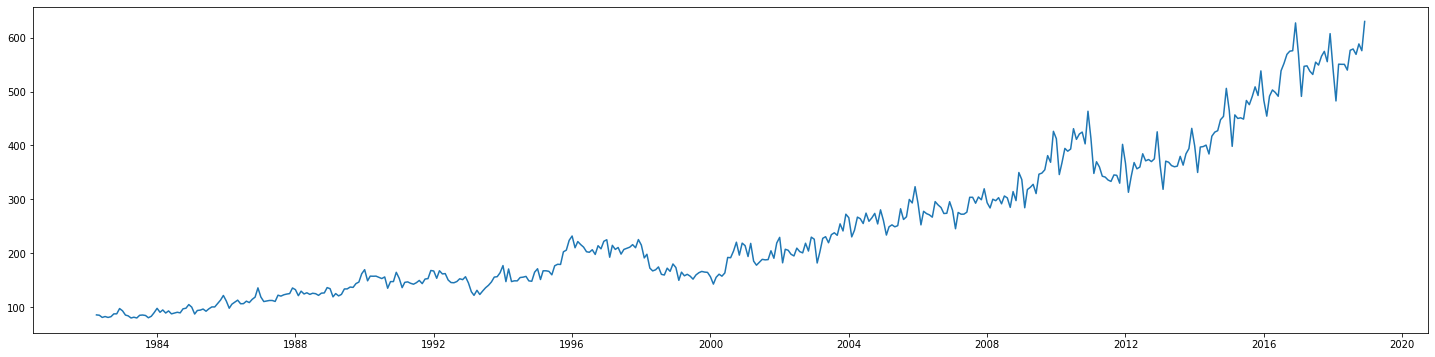

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(dat.Month, dat.Turnover)

## Transformation

- Best to stabilise variance using log transformation
- We can also split data into a test and training sample.

In [4]:
import numpy as np
dat['logTurnover'] = np.log(dat['Turnover'])
train = dat.loc[1:404,:]
test = dat.loc[405:,:]

## Output

- The `auto_arima_f` function finds the best model.
  - The package is still under development and 
  - It is designed to work with many models and time series
  - The classes created by the package are not easy to inspect compared to `statsmodels`.

In [7]:
from statsforecast.arima import auto_arima_f
out = auto_arima_f(train['logTurnover'].to_numpy())
out['arma']

/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergenc

(2, 3, 0, 0, 1, 1, 0)

In [25]:
out

{'coef': {'ar1': 0.2788458485218801,
  'ma1': -0.8943704719287057,
  'sma1': -0.0041451305044343505,
  'ex_1': -72.54968100667351,
  'ex_2': 0.24188426586857759,
  'ex_3': 634.9983192985712,
  'ex_4': 1303.9093166620105,
  'ex_5': 1418.565918281681,
  'ex_6': 1512.345456739643,
  'ex_7': 1077.7682165051792,
  'ex_8': 493.7429946178072,
  'ex_9': 219.58309582085116,
  'ex_10': -96.43671964316115,
  'ex_11': -798.0211015826399,
  'ex_12': -541.3850241908303,
  'ex_13': -354.38237538747},
 'sigma2': 737375.1447353556,
 'var_coef': array([[ 2.08184522e-06,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  2.44905356e-06,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000

 - The first two numbers are $p$ and $q$, sixth number is $d$, other numbers relate to seasonal ARIMA
 - The selected model is ARIMA(2,1,3)

## Fit model using `statsmodels`


In [26]:
import statsmodels.api as smt
fitaa = sm.tsa.arima.model.ARIMA(train['logTurnover'], order = (2,1,3)).fit()
fitaa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            logTurnover   No. Observations:                  404
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 531.827
Date:                Wed, 22 Jun 2022   AIC                          -1051.653
Time:                        10:41:28   BIC                          -1027.660
Sample:                             0   HQIC                         -1042.154
                                - 404                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2090      3.974      0.053      0.958      -7.579       7.997
ar.L2          0.5427      2.531      0.214      0.830      -4.418       5.504
ma.L1         -0.5162      3.985     -0.130      0.897      -8.327       7.295
ma.L2         -0.6882      1.303     -0.528      0.597      -3.241       1.865
ma.L3          0.3425      1.634      0.210      0.834      -2.860       3.545
sigma2         0.0042      0.000     14.292      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 7.98
Prob(Q):                              0.44   Prob(JB):                         0.02
Heteroskedasticity (H):               1.37   Skew:                            -0.30
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Plot of forecast

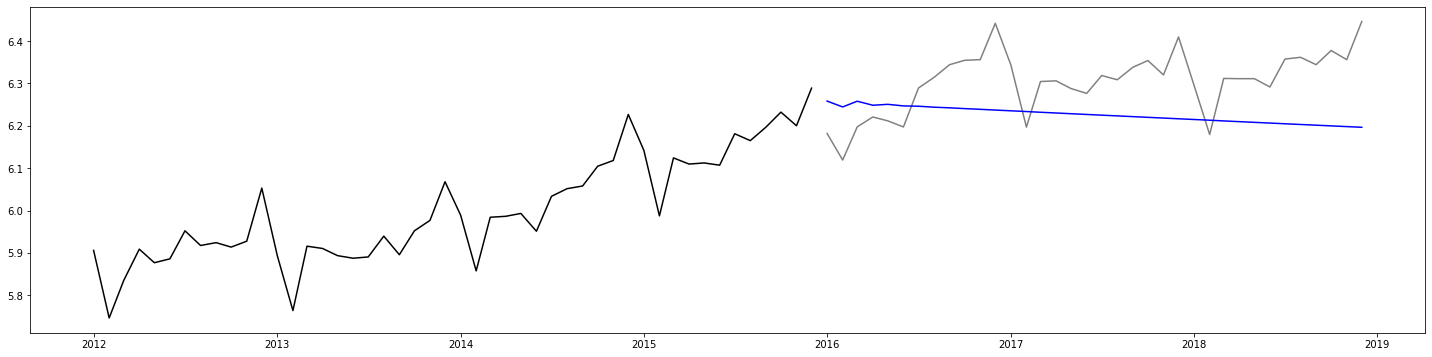

In [12]:
fcaa = fitaa.forecast(36)
fig, ax = plt.subplots(1,figsize=(25,6))
ax.plot(train['Month'].tail(48),train['logTurnover'].tail(48),color='black')
ax.plot(test['Month'],test['logTurnover'],color='gray')
ax.plot(test['Month'],fcaa,color='blue')


## Seasonality

- The ARIMA models as we have studied them so far do not take into account seasonality.
- The forecasts work for short horizons, but fail to mimic the seasonal pattern at long horizons .
- Looking at ACF and PACF plots leads to the same conclusion
- Let's consider the ACF and PACF for the difference of log Turnover

## ACF and PACF

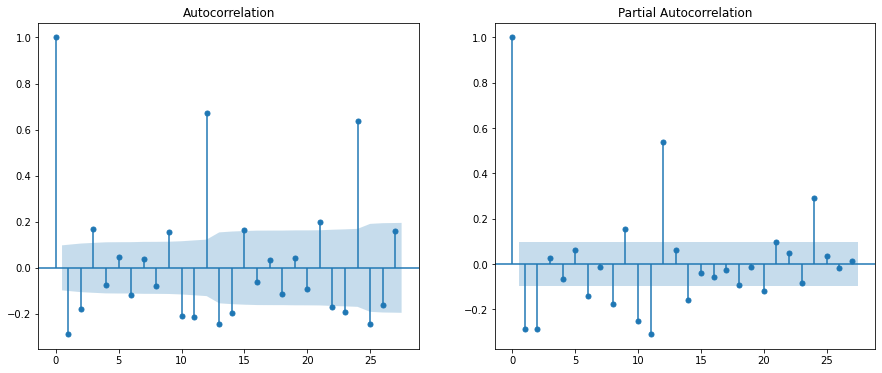

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2,figsize=(15,6))
dify = train.diff()['logTurnover'].iloc[2:]
plot_acf(dify,ax=ax[0])
plot_pacf(dify,ax=ax[1])
plt.show()

## Pure Seasonal models

- Seasonal AR(1): $Y_t=\phi^{(s)} Y_{t-m}+\epsilon_t$
- Seasonal AR(2): $Y_t=\phi_1^{(s)} Y_{t-m}+\phi_2^{(s)} Y_{t-2m}+\epsilon_t$
- Seasonal AR(p): $(1-\Phi^{(s)}(L^m))Y_t=\epsilon_t$
- Seasonal ARIMA(p,d,q): $(1-\Phi^{(s)}(L^m))(1-L^m)^DY_t=(1+\Theta^{(s)}(L^m))\epsilon_t$


## Seasonal ARIMA

The most general form for seasonal ARIMA is

$$(1-\Phi(L))(1-\Phi^{(s)}(L^m))(1-L)^d(1-L^m)^DY_t=(1+\Theta(L))(1+\Theta^{(s)}(L^m))\epsilon_t$$

- Note that seasonal difference/components are always applied before non-seasonal components.

- The auto arima algorithm can be generalised to seasonal ARIMA

## Auto arima (seasonal)

Specify the seasonal period and set `seasonal=True` in `auto_arima_f`

In [27]:
out = auto_arima_f(train['logTurnover'].to_numpy(),seasonal=True,period=12)
print(out['arma'])

/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/.virtualenv/python3.9/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeW

(2, 3, 2, 2, 12, 0, 1)


- First two numbers are non-seasonal AR and MA orders.
- Third and fourth numbers are seasonal AR and MA orders.
- Fifth number is period.
- Sixth and Seventh number are non-seasonal and seasonal orders of differencing.

In [43]:
out.keys()

dict_keys(['coef', 'sigma2', 'var_coef', 'mask', 'loglik', 'aic', 'arma', 'residuals', 'code', 'n_cond', 'nobs', 'model', 'xreg', 'bic', 'aicc', 'ic', 'x', 'lambda'])

In [36]:
out['coef']

{'ar1': 1.4950272444503638,
 'ar2': -0.6042819772790677,
 'ma1': -0.9348259089618977,
 'ma2': 0.1883384425501466,
 'ma3': 0.08816510039082869,
 'sar1': -0.17736048388551304,
 'sar2': 0.004976986987146017,
 'sma1': -0.6182575492373096,
 'sma2': -0.22384114543899383,
 'drift': 0.004052622731467806}

In [44]:
[out['loglik'], out['aicc'], out['bic']]

[619.8529241898765, -1217.0092784589087, -1174.050065219914]

In [37]:
out['var_coef']

array([[ 2.89379288e-07,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-3.25946664e-06,  2.62594531e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  6.50770512e-06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.50770512e-06,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.50770512e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

## Plots

In [16]:
fcaas = fitaas.forecast(36)
fig, ax = plt.subplots(1,figsize=(25,6))
dat.Month, dat.Turnover
ax.plot(train['Month'].tail(48),train['logTurnover'].tail(48),color='black')
ax.plot(test['Month'],test['logTurnover'],color='gray')
ax.plot(test['Month'],fcaas,color='blue')

NameError: name 'fitaas' is not defined

## Using Covariates

- An important characteristic of (S)ARIMA models is the ability for them to include covariates or regressors.
- The model becomes
$$(1-\Phi(L))(1-\Phi^{(s)}(L^m))(1-L)^d(1-L^m)^D\color{blue}{(y_t-\mathbf{x}'_t\boldsymbol{\beta})}=(1+\Theta(L))(1+\Theta^{(s)}(L^m))\epsilon_t$$

- This is a regression model with (S)ARIMA errors.


- If the purpose of the analysis is to forecast we can only use regressors that are themselves available when we make the forecast.
- Consider forecasting demand for bike sharing scheme.
- To forecast tomorrow's demand we cannot use tomorrow's weather.
- We can however use dummy variables for the type of day, public holidays, etc.

## Dataset

DC bikeshare data of [Hadi and Gama (2013)](https://link.springer.com/article/10.1007/s13748-013-0040-3) from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bike%20sharing%20dataset)

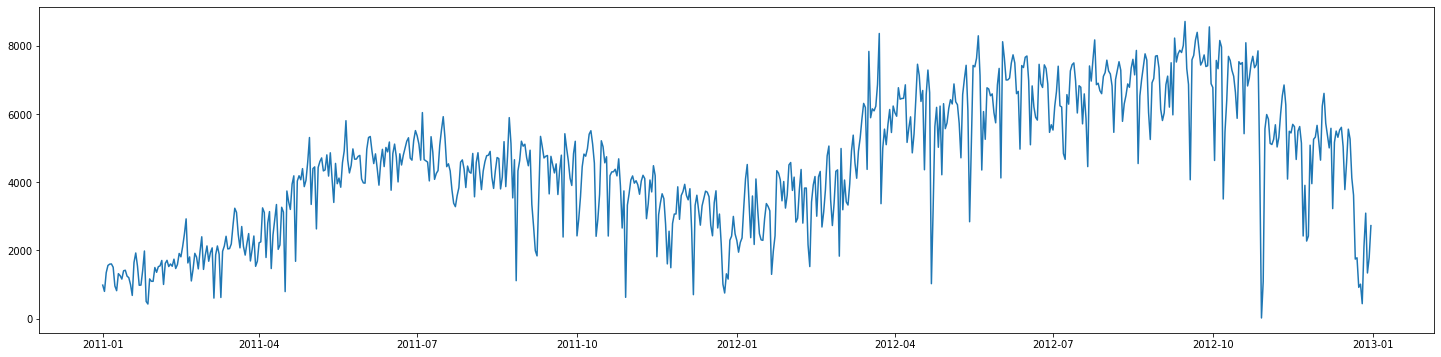

In [45]:
bikes=pd.read_csv('data/bike_sharing_daily.csv')
bikes['dteday']=pd.to_datetime(bikes['dteday'])
fig, ax = plt.subplots(1, figsize = (25, 6))
ax.plot(bikes['dteday'], bikes['cnt'])

## Application

- Can handle weekly seasonality by considering seasonal ARIMA models with a period of 7.
- Handle yearly seasonality with month dummies
- Keep holiday dummies
- Convert data into numpy array as input to `auto_arima`

In [46]:
bikes_clean = bikes[['cnt','mnth','holiday']]
bikes_clean['int']=1.0
bikes_clean = pd.get_dummies(bikes_clean, columns=['mnth'], drop_first=True)
bikes_arr = bikes_clean.to_numpy(dtype='float')
bikes_train=bikes_arr[:640,:]

/tmp/ipykernel_21415/1611146982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_clean['int']=1.0


## Fit and forecast

In [47]:
out = auto_arima_f(bikes_train[:,0],xreg = bikes_train[:,1:],seasonal=True,period=7)
print(out['arma'])

/home/fli/.virtualenv/python3.9/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: possible convergence problem: minimize gave code 1]
  warnings.warn(
/home/fli/downloads/statsforecast-0.5.5/statsforecast/arima.py:878: UserWarning: poss

(1, 1, 0, 1, 7, 1, 0)


For this particular dataset auto arima chooses a SARIMA(0,1,3)(0,0,1)[7]

## Fit model

In [48]:
fitaasx = sm.tsa.arima.model.ARIMA(bikes_train[:,0],exog=bikes_train[:,1:],order = (0,1,3),seasonal_order=(0,0,1,7)).fit()
fitaasx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  640
Model:             ARIMA(0, 1, 3)x(0, 0, [1], 7)   Log Likelihood               -5229.593
Date:                           Wed, 22 Jun 2022   AIC                          10495.187
Time:                                   10:50:52   BIC                          10575.465
Sample:                                        0   HQIC                         10526.349
                                           - 640                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -22.5589    253.678     -0.089      0.929    -519.759     474.642
const       3.533e-06   9925.982   3.56e-10      1.000   -1.95e+04    1.95e+04
x2           116.1002    792.500      0.146      0.884   -1437.171    1669.371
x3          2048.1998    842.849      2.430      0.015     396.246    3700.154
x4          2373.7999   1117.505      2.124      0.034     183.530    4564.069
x5          1628.8999   1175.737      1.385      0.166    -675.502    3933.302
x6           171.0002   1199.322      0.143      0.887   -2179.629    2521.629
x7           168.1000   1292.395      0.130      0.897   -2364.948    2701.148
x8           483.7000   1395.971      0.346      0.729   -2252.353    3219.753
x9            58.8000   1433.398      0.041      0.967   -2750.609    2868.209
x10        -1231.5999   1468.799     -0.839      0.402   -4110.393    1647.193
x11         -529.4000   1292.024     -0.410      0.682   -3061.720    2002.920
x12         -112.2000   1005.156     -0.112      0.911   -2082.270    1857.870
ma.L1         -0.5322      0.038    -13.835      0.000      -0.608      -0.457
ma.L2         -0.1765      0.045     -3.965      0.000      -0.264      -0.089
ma.L3         -0.0774      0.043     -1.801      0.072      -0.162       0.007
ma.S.L7       -0.0117      0.037     -0.317      0.751      -0.084       0.061
sigma2      7.774e+05   2.96e+04     26.308      0.000     7.2e+05    8.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               604.59
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.74   Skew:                            -1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecast

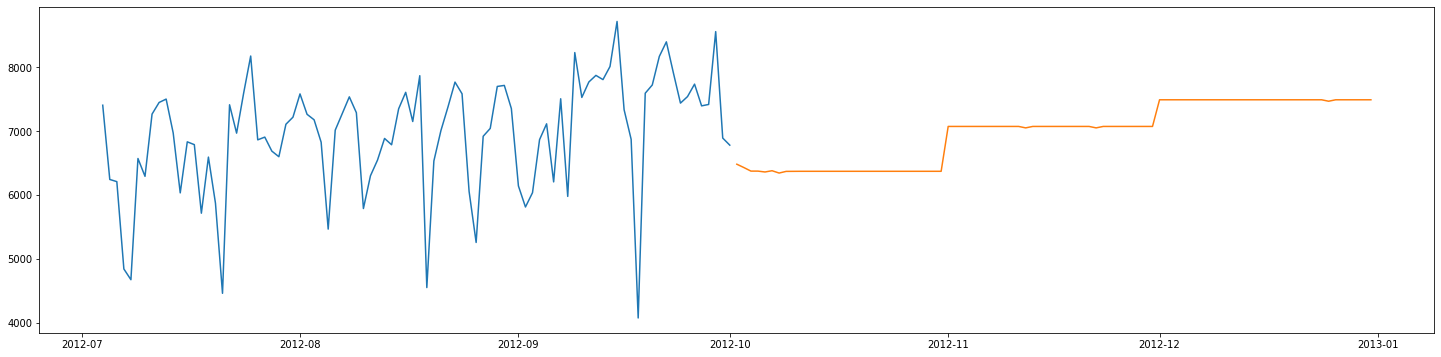

In [49]:
future_x =  bikes_arr[640:,1:]
fc = fitaasx.forecast(len(future_x),exog = future_x)

fig, ax = plt.subplots(1, figsize = (25, 6))
ax.plot(bikes.iloc[550:640,1], bikes.iloc[550:640,15])
ax.plot(bikes.iloc[640:,1], fc)

## Fourier terms

-  An alternative to month dummies is to use Fourier terms. For data with period $m$

$$x_t^{(s)}=\sin\left(\frac{2\pi j t}{m}\right)\quad\textrm{and}\quad x_t^{(c)}=\cos\left(\frac{2\pi j t}{m}\right)\quad \textrm{for}\,j=1,2,\dots,J$$

- Fourier terms can be used to represent any periodic function to an arbitrary degree of accuracy.
- In applied work, as few as 2-3 pairs of Fourier terms can be sufficient.
- This is particularly useful for long seasonalities (e.g. $m=365$).

## Wrap-up

- Modern algorithms for selecting the order of ARIMA models are based on stepwise search, likelihood estimation and the AICc.
- Seasonal ARIMA can capture seasonal effects with a small period.
- Covariates based on calendar effects can be very useful for data based on human behaviour.
- Regression with Fourier terms can capture seasonal effects with a long period. 